# 1. Imports

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random as rd
# OBS you can also implement your own Poisson pdf
# but for high lambdas there are issues because of the large numbers
from scipy.stats import poisson

# 2. Simulation : ERDOS-RENYI NETWORKS

In [23]:
def ER_graph(N=1000,p=.5):
    # generate an Erdos-Renyi graph
    # N : vertices in the returned graph
    # p : probability of connection
    
    adj = np.zeros((N,N));
    # set elements to 1 with probability p
    adj[np.random.uniform(size=(N,N))<p]=1;
    # symmetrize
    adj = np.triu(adj)+np.transpose(np.triu(adj));
    # remove diagonal elements
    adj[range(0,N),range(0,N)] = 0;
    
    return nx.from_numpy_matrix(adj);

In [12]:
def get_degrees(G):
    return [G.degree[node] for node in range(0,G.number_of_nodes())] 

def factorial(n):
    if n==1 or n==0:
        return 1;
    else:
        return n*factorial(n-1);

def poisson_pdf(x,lamb):
    return np.exp(-lamb)*np.power(lamb,x)/factorial(x);

def get_paths(G):
    # return the mean of the shortest path and the diameter of the graph
    # G : graph

    adj = nx.to_numpy_matrix(G); adj_k = np.copy(adj);
    diam = -1; 
    k = 1; shortest = []
    shortest += [np.count_nonzero(adj_k==1)];
    
    # using the properties of the adjacency matrix we count
    # the number path of length k (and finally the diameter)
    while diam==-1:
        k+=1;
        adj_k_old = np.copy(adj_k);
        adj_k = np.matmul(adj_k,adj);
        if not np.any(adj_k==0):
            diam = k
        np.fill_diagonal(adj_k,0)
        shortest += [np.count_nonzero(adj_k[adj_k_old==0])];
        if k>20: break;
    shortest_mean = 0;
    for k in range(0,diam):
        shortest_mean += (k+1)*shortest[k];
    shortest_mean /= sum(shortest);
    return shortest_mean,diam

In [161]:
# On génère le graphe
N = 60; p = 0.06;
G_ER = ER_graph(N,p)

23


C:\Users\Arthur\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Arthur\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\Arthur\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Arthur\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be remove

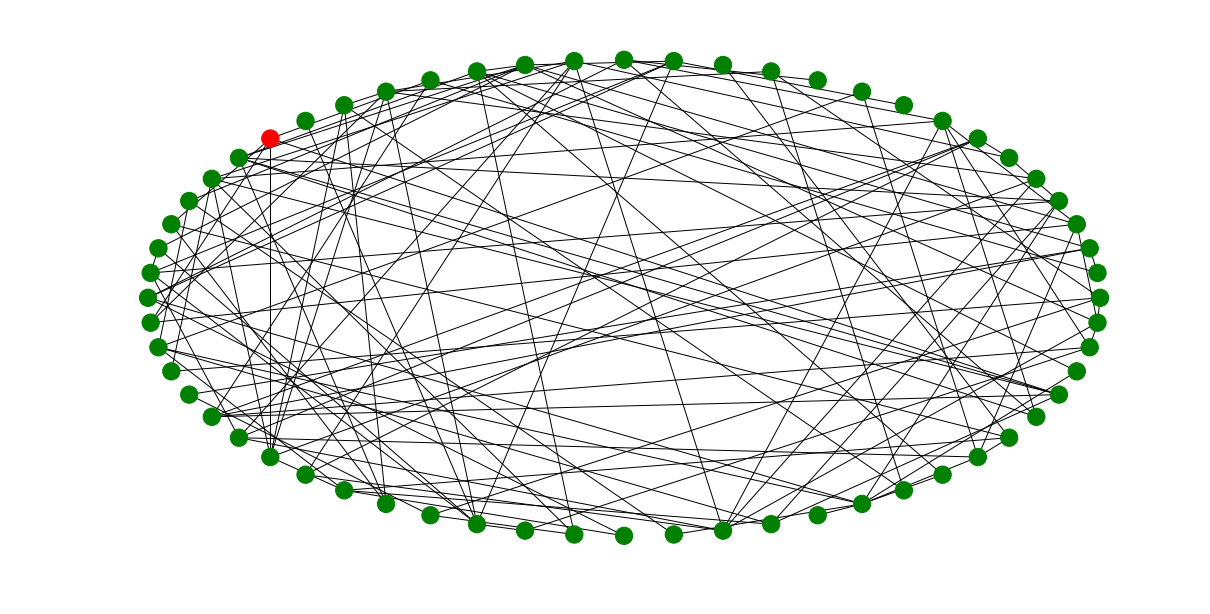

In [162]:
color_map = []
malade0 = rd.randint(0,N) # une personne au hasard sera malade au début
print (malade0)
for i in range (N):
    G_ER.node[i]['etat']='sain' # on définit l'état sain de tout le monde
    color_map.append('green') # du coup ils sont tous verts
G_ER.node[malade0]['etat']='malade' # le malade 0 a l'état 'malade'
color_map[malade0]='red' # sa couleur est donc rouge

nx.draw_circular(G_ER,node_color = color_map)
plt.show()

In [163]:
malades = []
G_ER.node[0]['etat'] = 'sains'
malades.append(malade0)
for i in malades :
    voisins = G_ER.neighbors(i)
    print(voisins)
    for j in voisins:
        G_ER.node[j]['etat'] = 'malade'
        print(j)
print(len(voisins))
list(G_ER.nodes(data=True))
G_ER.edges(malade0)

[19, 27, 31, 37, 56]
19
27
31
37
56
5


[(23, 19), (23, 27), (23, 31), (23, 37), (23, 56)]

C:\Users\Arthur\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Arthur\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\Arthur\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Arthur\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be remove

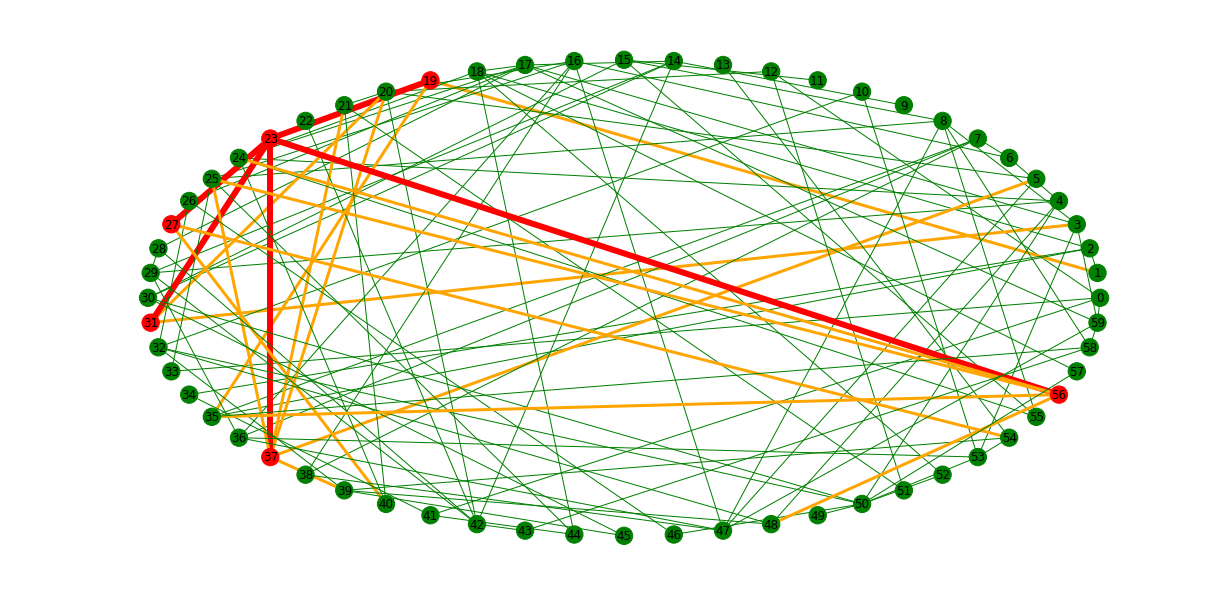

In [164]:
for i in range(N):
    if G_ER.node[i]['etat'] == 'malade':
        color_map[i] = 'red'
    else :
        color_map[i]='green'
        
for edge in range(len(G_ER.edges())):
    arrete = G_ER[G_ER.edges()[edge][0]][G_ER.edges()[edge][1]]
    arrete['color']='green' # toutes les arretes en jaune
    arrete['weight']=1
    if G_ER.node[G_ER.edges()[edge][0]]['etat'] == 'malade' and G_ER.node[G_ER.edges()[edge][1]]['etat'] == 'malade' :
        arrete['color']='red'# arrete rouge si les deux personnes sont malades
        arrete['weight']=6
    elif ( G_ER.node[G_ER.edges()[edge][0]]['etat'] == 'malade' and G_ER.node[G_ER.edges()[edge][1]]['etat'] == 'sain' ) or ( G_ER.node[G_ER.edges()[edge][0]]['etat'] == 'sain' and G_ER.node[G_ER.edges()[edge][1]]['etat'] == 'malade' ) :
        arrete['color']='orange' # les contaminations possibles en orange
        arrete['weight']=3


edges = G_ER.edges()
color_edges = [G_ER[u][v]['color'] for u,v in edges] #on recupere la liste des couleurs
weights = [G_ER[u][v]['weight'] for u,v in edges]

nx.draw_circular(G_ER,node_color = color_map,edge_color=color_edges, width = weights, with_labels = True)
plt.show()